<a href="https://colab.research.google.com/github/catalinapesquet/PyTorch-Notes-and-Codes/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Tue Oct 15 16:30:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.4.1+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

* Healthcare, analysis of medicine data.

* Image segmentation (apple for example).

* Face recognition.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In machine learning, overfitting occurs when an algorithm fits too closely or even exactly to its training data, resulting in a model that can’t make accurate predictions or conclusions from any data other than the training data.

How to detect overfit models?

To understand the accuracy of machine learning models, it’s important to test for model fitness. K-fold cross-validation is one of the most popular techniques to assess accuracy of the model.


## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

How to avoid overfitting?

* Early stopping: this method seeks to pause training before the model starts learning the noise within the model. This approach risks halting the training process too soon, leading to the opposite problem of underfitting.
* Train with more data: Expanding the training set to include more data can increase the accuracy of the model by providing more opportunities to parse out the dominant relationship among the input and output variables.
* Data augmentation: While it is better to inject clean, relevant data into your training data, sometimes noisy data is added to make a model more stable. However, this method should be done sparingly.
* Feature selection: Feature selection is the process of identifying the most important parameters within the training data and then eliminating the irrelevant or redundant ones.


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt


Download the data:
* root: str - which folder do you want to download the data to?
* train: Bool - do you want the training or test split?
* download: Bool - should the data be downloaded?
* transform: torchvision.transforms - what transformations would you like to do on the data?
* target_transform - you can transform the targets (labels) if you like too.

In [ ]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # root directory of dataset
    train=True, # training dataset
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format
    target_transform=None # A function/transform that takes in the target and transforms it.
)

# Set up testing data
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 15994970.66it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 477113.17it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4400505.34it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 9845234.51it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# What's the shape of the image ?
image.shape

torch.Size([1, 28, 28])

The shape of the image tensor is [1, 28, 28]

In [ ]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

So we've got 60,000 training samples and 10,000 testing samples.

In [ ]:
# See classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

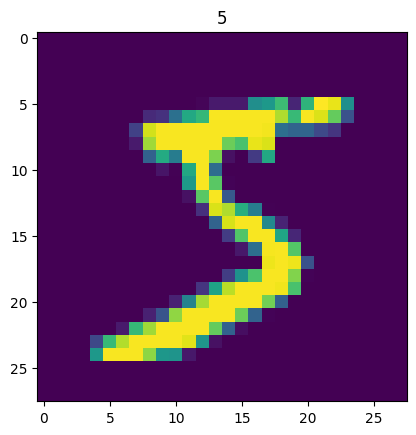

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label)

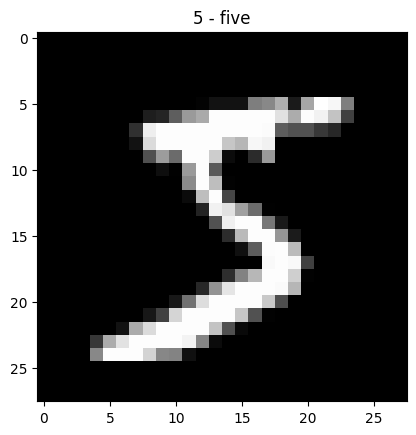

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

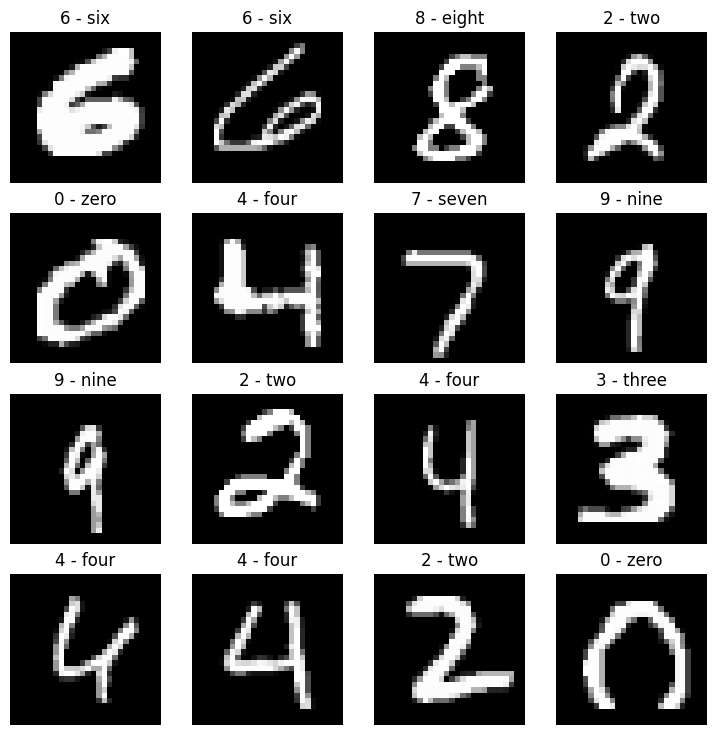

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

We got a dataset. Need to prepare it with torch.utils.data.DataLoader, turns a large dataset into batches/mini batches

In [ ]:
from torch.utils.data import DataLoader

# Setup batch size
BATCH_SIZE=32
# Turn data into iterables
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ad07a4bfac0>, <torch.utils.data.dataloader.DataLoader object at 0x7ad07a4bf430>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


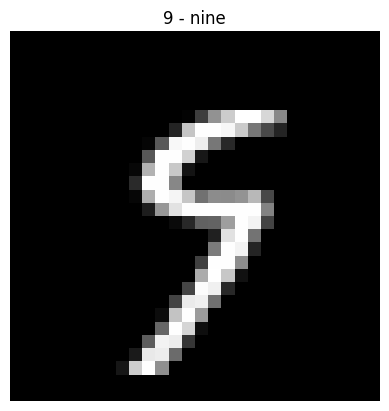

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
class MNISTModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # Size of the convolving kernel
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x = self.block_1(x)
    # print(f"Output shape of conv block 1: {x.shape}")
    x = self.block_2(x)
    # print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x


In [ ]:
device

'cuda'

In [ ]:
model = MNISTModel(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)
model

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:

# Check out the model state dict to find out what patterns our model wants to learn
model.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2767, -0.0781,  0.3062],
                        [-0.0730,  0.0673, -0.1623],
                        [ 0.1958,  0.2938, -0.2445]]],
              
              
                      [[[ 0.2897,  0.0624,  0.2463],
                        [ 0.0451,  0.1607, -0.0471],
                        [ 0.2570,  0.0493, -0.1556]]],
              
              
                      [[[ 0.0850, -0.1536, -0.0391],
                        [-0.1354,  0.2211, -0.2631],
                        [-0.1537, -0.0941, -0.2004]]],
              
              
                      [[[ 0.0315, -0.3292,  0.3010],
                        [-0.2832,  0.2573,  0.0555],
                        [-0.1082,  0.2060,  0.0520]]],
              
              
                      [[[ 0.2693,  0.0364, -0.1051],
                        [ 0.0896, -0.0904,  0.1403],
                        [ 0.2976,  0.1927, -0.1457]]],
              
              
           

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
%%time
from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNISTModel(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to("cpu")

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_cpu.train()

    # Put data on CPU
    X, y = X.to("cpu"), y.to("cpu")

    # Forward pass
    y_pred = model_cpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss for number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0

  # Put model in eval mode
  model_cpu.eval()

  # Turn on inference mode
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on CPU
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.286 | Test loss: 0.065
Epoch: 1 | Loss: 0.067 | Test loss: 0.059
Epoch: 2 | Loss: 0.052 | Test loss: 0.041
Epoch: 3 | Loss: 0.045 | Test loss: 0.041
Epoch: 4 | Loss: 0.039 | Test loss: 0.043
CPU times: user 3min 47s, sys: 1.01 s, total: 3min 48s
Wall time: 3min 57s


In [ ]:
%%time
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# Train on GPU
model_gpu = MNISTModel(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  model_gpu.train()
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_gpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss to number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0
  # Put model in eval mode and turn on inference mode
  model_gpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    # Adjust test loss total for number of batches
    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.270 | Test loss: 0.070
Epoch: 1 | Loss: 0.070 | Test loss: 0.050
Epoch: 2 | Loss: 0.055 | Test loss: 0.053
Epoch: 3 | Loss: 0.047 | Test loss: 0.047
Epoch: 4 | Loss: 0.041 | Test loss: 0.042
CPU times: user 59.5 s, sys: 554 ms, total: 1min
Wall time: 1min 1s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

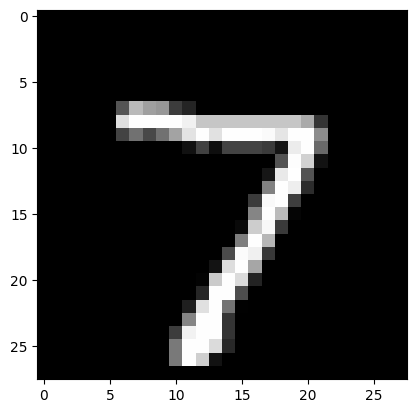

In [ ]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [ ]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

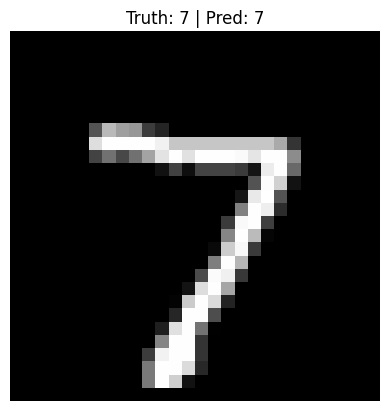

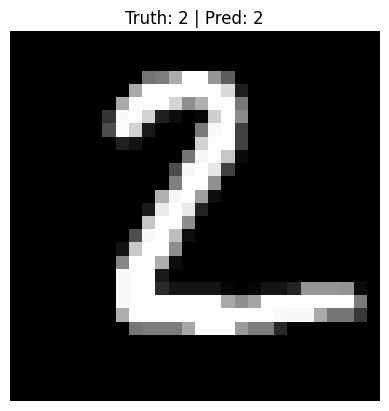

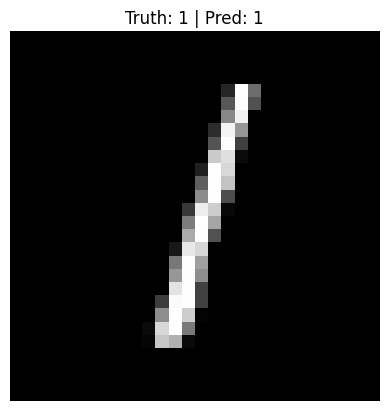

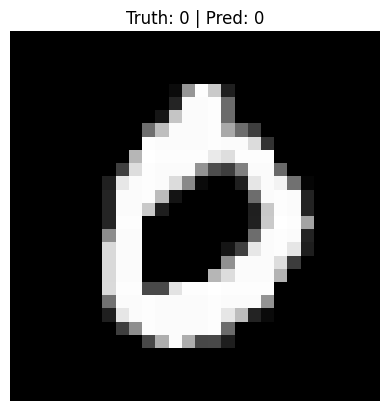

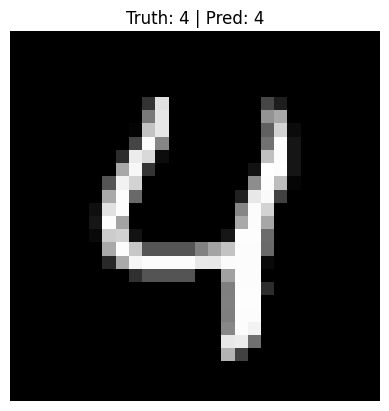

In [ ]:
num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 21.6 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher


0.23.1


In [ ]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model_gpu(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)


0it [00:00, ?it/s]

10000

In [ ]:
test_data.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

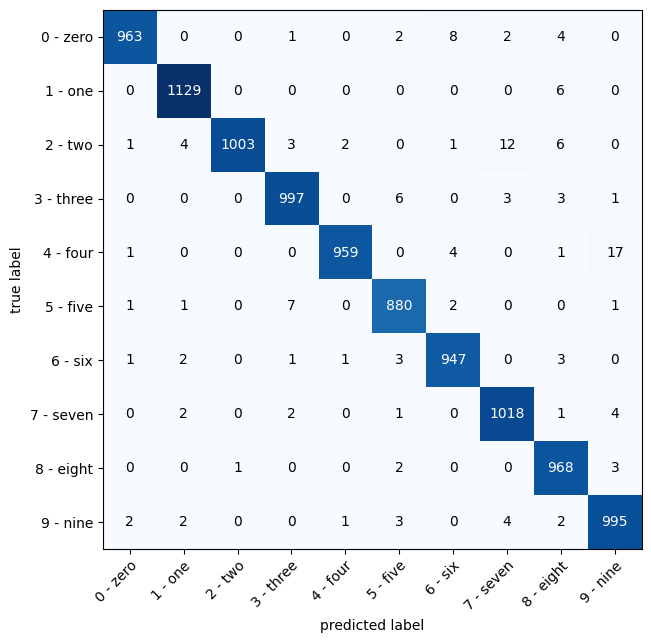

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=test_data.targets)

# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")


Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?